In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
df_1 = pd.read_csv('fear_greed_index.csv')
df_2 = pd.read_csv('historical_data.csv')

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [8]:
df_1.head(10)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
5,1517895000,8,Extreme Fear,2018-02-06
6,1517981400,36,Fear,2018-02-07
7,1518067800,30,Fear,2018-02-08
8,1518154200,44,Fear,2018-02-09
9,1518240600,54,Neutral,2018-02-10


In [9]:
df_2.head(10)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,02-12-2024 22:50,1298.215466,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.000493,7.330000e+14,1.730000e+12
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,BUY,02-12-2024 22:50,1299.624972,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,9.060000e+14,1.730000e+12
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,BUY,02-12-2024 22:50,1443.664541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.011900,3.960000e+14,1.730000e+12
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,46.00,368.00,BUY,02-12-2024 22:50,1477.652641,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.016100,9.460000e+14,1.730000e+12
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,12.50,100.00,BUY,02-12-2024 22:50,1523.636541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.004375,3.470000e+13,1.730000e+12


In [10]:
df_2['Timestamp']=pd.to_datetime(df_2['Timestamp IST'],format = "%d-%m-%Y %H:%M")

In [11]:
df_2['Date']=df_2['Timestamp'].dt.date

In [12]:
df_2['date']=pd.to_datetime(df_2['Date'])

In [13]:
df_2['date'].dtypes

dtype('<M8[ns]')

In [14]:
df_2['date'].head()

0   2024-12-02
1   2024-12-02
2   2024-12-02
3   2024-12-02
4   2024-12-02
Name: date, dtype: datetime64[ns]

In [15]:
df_1['date'].head()

0    2018-02-01
1    2018-02-02
2    2018-02-03
3    2018-02-04
4    2018-02-05
Name: date, dtype: object

In [16]:
print('date range :',df_1['date'].min(), 'to', df_1['date'].max())

date range : 2018-02-01 to 2025-05-02


In [17]:
print('date range of df_2 :',df_2['Date'].min(), 'to', df_2['Date'].max())

date range of df_2 : 2023-05-01 to 2025-05-01


In [18]:
df_1.shape

(2644, 4)

In [19]:
df_2.shape

(211224, 18)

In [20]:
startdate = df_2['Timestamp'].min().date()
enddate = df_2['Timestamp'].max().date()

In [21]:
df_1['date'] = pd .to_datetime(df_1['date'])

In [22]:
df_1_filtered = df_1[(df_1['date'] >= pd.to_datetime(startdate)) & 
                     (df_1['date'] <= pd.to_datetime(enddate))]

In [23]:
df_1['date'].dtype

dtype('<M8[ns]')

In [24]:
merged_df = pd.merge(
    df_2,
    df_1_filtered[['date','classification','value']],
    on="date",
    how="left"
)

In [25]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-12-02 22:50:00,2024-12-02,2024-12-02,Extreme Greed,80.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-12-02 22:50:00,2024-12-02,2024-12-02,Extreme Greed,80.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-12-02 22:50:00,2024-12-02,2024-12-02,Extreme Greed,80.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-12-02 22:50:00,2024-12-02,2024-12-02,Extreme Greed,80.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-12-02 22:50:00,2024-12-02,2024-12-02,Extreme Greed,80.0


In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [27]:
merged_df.drop(columns=['Date'],inplace=True)

In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [29]:
merged_df.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
classification      6
value               6
dtype: int64

In [30]:
df=merged_df.dropna(subset=['classification','value'])

In [31]:
df.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
classification      0
value               0
dtype: int64

In [32]:
df.shape

(211218, 19)

In [33]:
df['classification'].nunique()

5

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211218 entries, 0 to 211223
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211218 non-null  object        
 1   Coin              211218 non-null  object        
 2   Execution Price   211218 non-null  float64       
 3   Size Tokens       211218 non-null  float64       
 4   Size USD          211218 non-null  float64       
 5   Side              211218 non-null  object        
 6   Timestamp IST     211218 non-null  object        
 7   Start Position    211218 non-null  float64       
 8   Direction         211218 non-null  object        
 9   Closed PnL        211218 non-null  float64       
 10  Transaction Hash  211218 non-null  object        
 11  Order ID          211218 non-null  int64         
 12  Crossed           211218 non-null  bool          
 13  Fee               211218 non-null  float64       
 14  Trade ID 

In [35]:
# outliers detection

In [36]:
def detect_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"{column} → {len(outliers)} outliers")
    return outliers

In [37]:
detect_outliers_IQR(df, 'Closed PnL')

Closed PnL → 48942 outliers


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
44,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0570,2446.39,22156.95,SELL,03-12-2024 14:39,10000.498600,Sell,3008.231185,0x7b57a76296641058064004184ed84d01d0005daded34...,52200758791,True,7.754933,5.190000e+14,2024-12-03 14:39:00,2024-12-03,Extreme Greed,76.0
45,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0570,25.00,226.43,SELL,03-12-2024 14:39,7554.108602,Sell,30.741534,0x7b57a76296641058064004184ed84d01d0005daded34...,52200758791,True,0.079248,3.350000e+14,2024-12-03 14:39:00,2024-12-03,Extreme Greed,76.0
46,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0480,33.40,302.20,SELL,03-12-2024 14:39,7529.108602,Sell,40.770089,0x7b57a76296641058064004184ed84d01d0005daded34...,52200758791,True,0.105771,5.140000e+14,2024-12-03 14:39:00,2024-12-03,Extreme Greed,76.0
47,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0464,200.00,1809.28,SELL,03-12-2024 14:39,7495.708602,Sell,243.812267,0x7b57a76296641058064004184ed84d01d0005daded34...,52200758791,True,0.633248,9.540000e+14,2024-12-03 14:39:00,2024-12-03,Extreme Greed,76.0
48,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0424,209.26,1892.21,SELL,03-12-2024 14:39,7295.708602,Sell,254.263735,0x7b57a76296641058064004184ed84d01d0005daded34...,52200758791,True,0.662274,7.470000e+14,2024-12-03 14:39:00,2024-12-03,Extreme Greed,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.256600,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,2025-04-25 15:35:00,2025-04-25,Greed,60.0
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.577300,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,2025-04-25 15:35:00,2025-04-25,Greed,60.0
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.440200,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,2025-04-25 15:35:00,2025-04-25,Greed,60.0
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.789400,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,2025-04-25 15:35:00,2025-04-25,Greed,60.0


<Axes: xlabel='Closed PnL'>

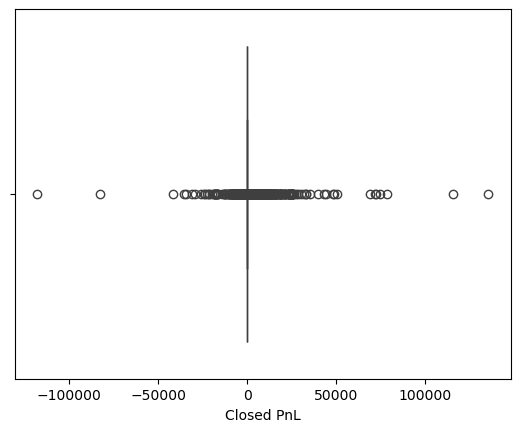

In [38]:
sns.boxplot(x=df['Closed PnL'])

In [39]:
# Eda visualization

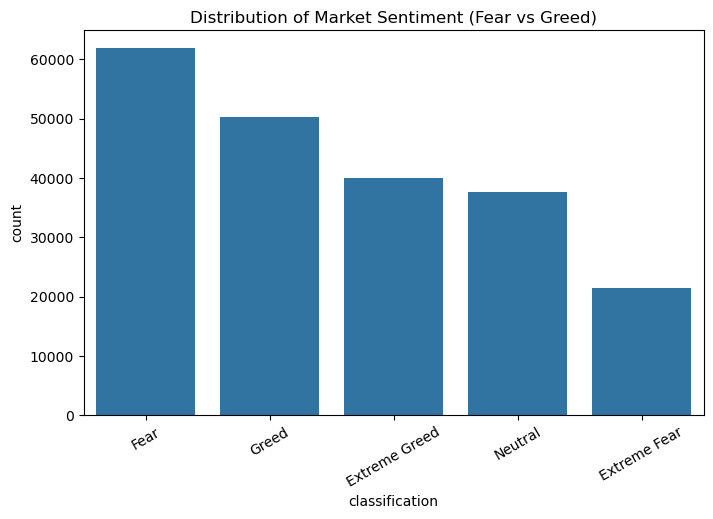

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(x='classification', data=df, order=df['classification'].value_counts().index)
plt.title("Distribution of Market Sentiment (Fear vs Greed)")
plt.xticks(rotation=30)
plt.savefig("outputs/sentiment_distribution.png")
plt.show()

#### Time series sentiment value

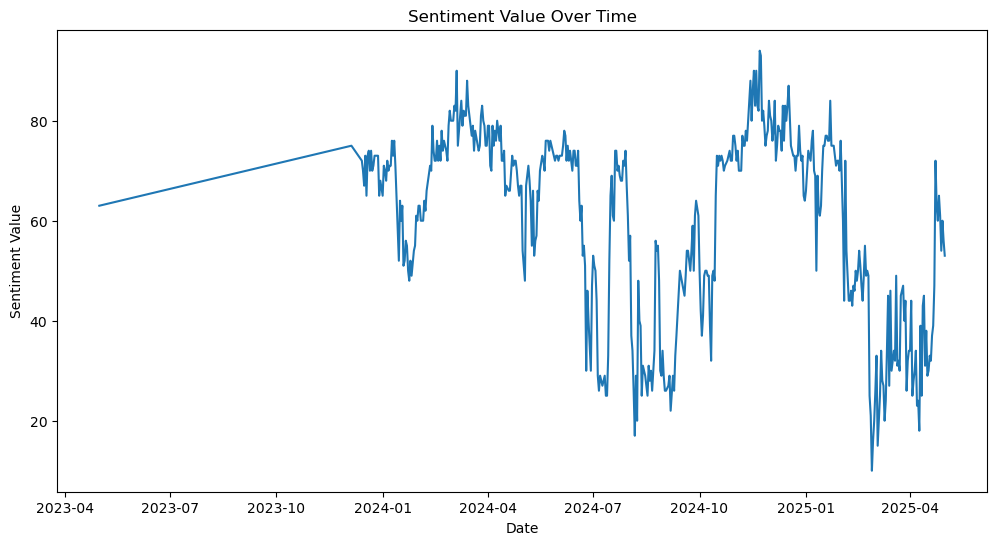

In [42]:
plt.figure(figsize=(12,6))
plt.plot(df.groupby('date')['value'].mean())
plt.title("Sentiment Value Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment Value")
plt.savefig("outputs/sentiment_time_series.png")
plt.show()

### 3. Distribution of Closed PnL

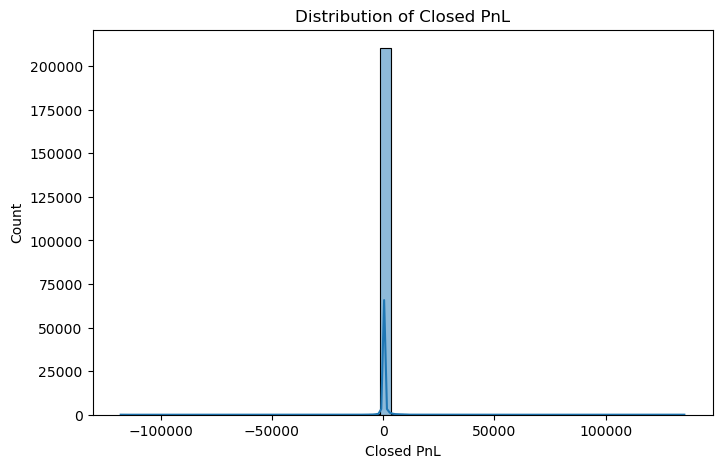

In [44]:
plt.figure(figsize=(8,5))
sns.histplot(df['Closed PnL'], bins=50, kde=True)
plt.title("Distribution of Closed PnL")
plt.savefig("outputs/closed_pnl_distribution.png")
plt.show()

#### Boxplot: PnL vs Market Sentiment

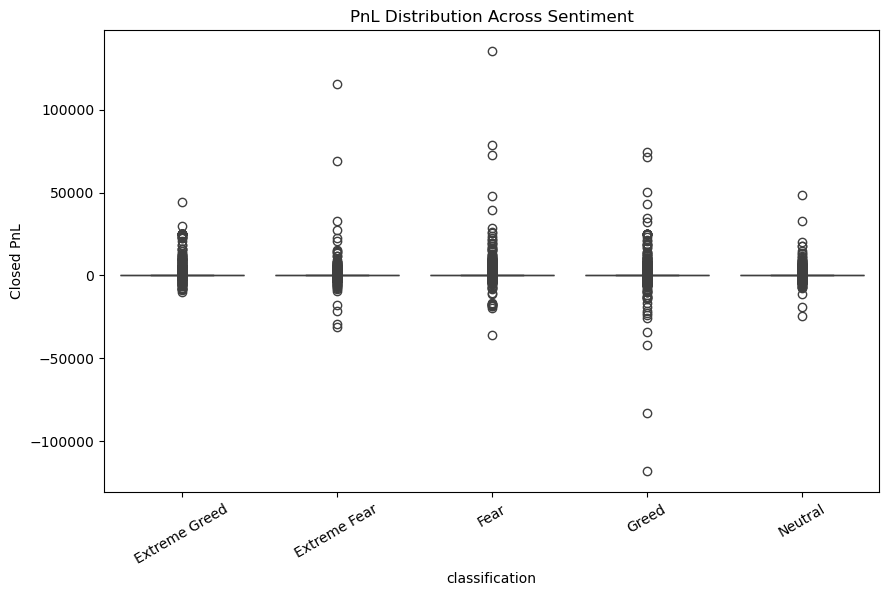

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x='classification', y='Closed PnL', data=df)
plt.title("PnL Distribution Across Sentiment")
plt.xticks(rotation=30)
plt.savefig("outputs/pnl_vs_sentiment.png")
plt.show()

#### Trading Volume vs Sentiment

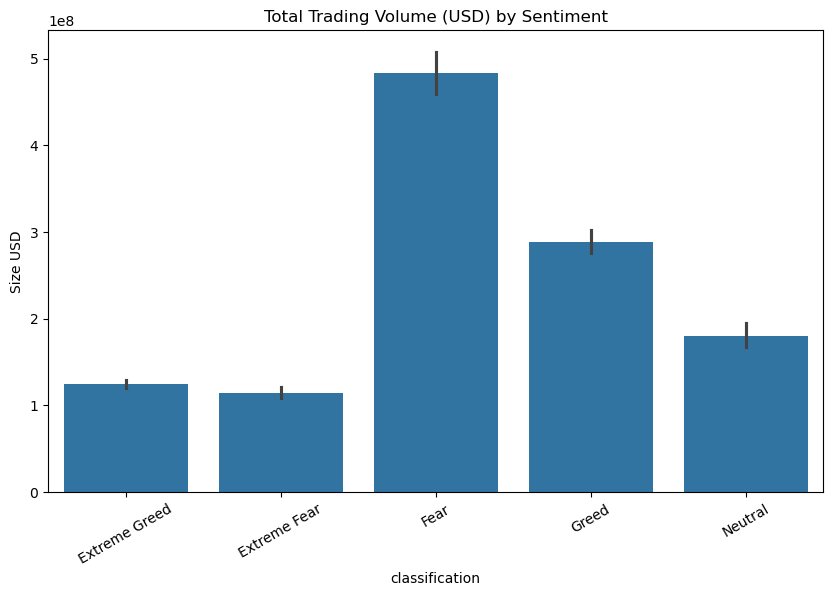

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x='classification', y='Size USD', data=df, estimator=sum)
plt.title("Total Trading Volume (USD) by Sentiment")
plt.xticks(rotation=30)
plt.savefig("outputs/volume_vs_sentiment.png")
plt.show()

#### Relationship with sentiment

Boxplot of numerical features vs classification

<Axes: xlabel='classification', ylabel='Closed PnL'>

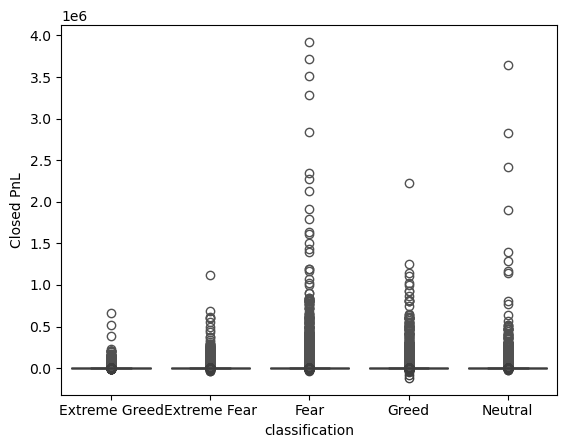

In [50]:
sns.boxplot(x='classification', y='Closed PnL', data=df)
sns.boxplot(x='classification', y='Size USD', data=df)
sns.boxplot(x='classification', y='Fee', data=df)

#### categorical analysis

<Axes: xlabel='Side', ylabel='count'>

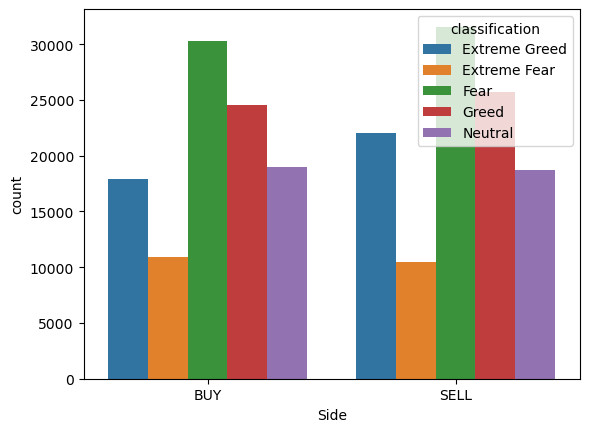

In [52]:
sns.countplot(x='Side', hue='classification', data=df)

#### Correlation Plot

In [54]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

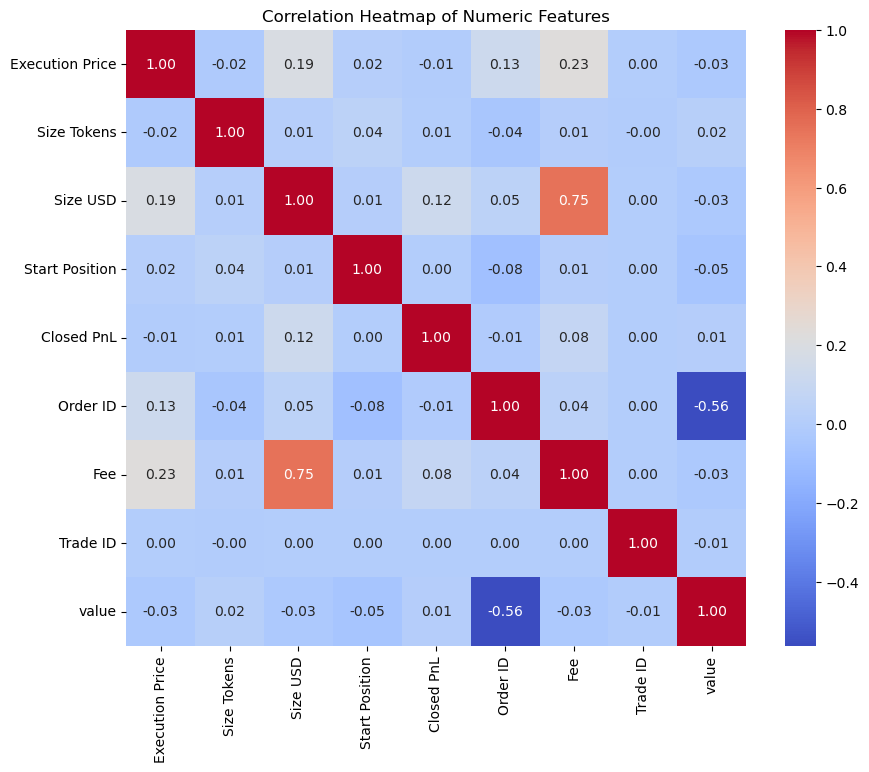

In [55]:
# Correlation heatmap
plt.figure(figsize=(10,8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.savefig("outputs/correlation_heatmap.png")
plt.show()

In [56]:
df.to_csv("outputs/merged_dataset.csv", index=False)

## handling outliers

In [58]:
col = "Closed PnL"

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [59]:
# Replace outliers with median
median = df[col].median()
df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound),
                   median, df[col])

C:\Users\rptha\AppData\Local\Temp\ipykernel_11556\2878543325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound),


In [60]:
print("After handling outliers:")
print(df[col].describe())

After handling outliers:
count    211218.000000
mean          0.789627
std           2.615712
min          -8.683848
25%           0.000000
50%           0.000000
75%           0.000000
max          14.475064
Name: Closed PnL, dtype: float64


<Axes: xlabel='Closed PnL'>

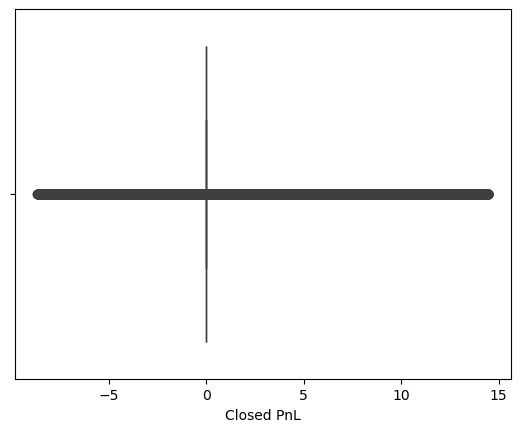

In [61]:
sns.boxplot(x=df['Closed PnL'])

In [62]:
# Execution Price
detect_outliers_IQR(df, 'Execution Price')

Execution Price → 42183 outliers


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
1112,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,SOL,258.0,10.0000,2580.00,SELL,26-01-2025 11:35,0.0000,Open Short,0.000,0x47f3708c31b30d2a2fea041c86b10101f50043c72187...,66598729169,False,0.247680,7.080000e+14,2025-01-26 11:35:00,2025-01-26,Greed,73.0
1113,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,SOL,258.0,20.0000,5160.00,SELL,26-01-2025 11:35,-10.0000,Open Short,0.000,0x553ae89df7e9d6f003e7041c86b10101fc00b7b05f26...,66598729169,False,0.495360,3.120000e+14,2025-01-26 11:35:00,2025-01-26,Greed,73.0
1121,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,SOL,254.8,0.3900,99.37,BUY,26-01-2025 15:41,-30.0000,Close Short,1.248,0x89c26fb5761971c2f1e4041c8b535a02019c0002a07a...,66626872437,False,0.009539,5.420000e+12,2025-01-26 15:41:00,2025-01-26,Greed,73.0
1122,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,SOL,254.8,2.0000,509.60,BUY,26-01-2025 15:41,-29.6100,Close Short,6.400,0xcfaee8295a678446205c041c8b5360015d00aff5a2ea...,66626872437,False,0.048921,1.010000e+15,2025-01-26 15:41:00,2025-01-26,Greed,73.0
1123,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,SOL,254.8,4.0000,1019.20,BUY,26-01-2025 15:41,-27.6100,Close Short,12.800,0xf186bee86d02ef7fe5bb041c8b5362015700e727dcf4...,66626872437,False,0.097843,1.050000e+14,2025-01-26 15:41:00,2025-01-26,Greed,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210634,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,ETH,1453.0,72.1640,104854.29,SELL,09-04-2025 17:41,180.9939,Close Long,0.000,0x51b8c1a9fe9e837bf61a0421355eed02047600ac9d61...,85281286560,False,10.485429,6.800000e+14,2025-04-09 17:41:00,2025-04-09,Extreme Fear,18.0
210635,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,ETH,1453.0,72.8518,105853.67,SELL,09-04-2025 17:41,108.8299,Close Long,0.000,0xee89e05613cec5ee305d0421355eed020491003d7999...,85281286560,False,10.585366,5.790000e+14,2025-04-09 17:41:00,2025-04-09,Extreme Fear,18.0
210636,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,ETH,1453.0,27.1561,39457.81,SELL,09-04-2025 17:41,35.9781,Close Long,0.000,0xdc1bd17df621a314845b0421355eed02049a008d8889...,85281286560,False,3.945781,1.010000e+15,2025-04-09 17:41:00,2025-04-09,Extreme Fear,18.0
210637,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,ETH,1453.0,3.6917,5364.04,SELL,09-04-2025 17:41,8.8220,Close Long,0.000,0x1a053bbd3aafb6e5eceb0421355eed0204a800705050...,85281286560,False,0.536404,7.570000e+14,2025-04-09 17:41:00,2025-04-09,Extreme Fear,18.0


In [63]:
Q1 = df['Execution Price'].quantile(0.25)
Q3 = df['Execution Price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [64]:
median_exec_price = df['Execution Price'].median()

In [65]:
df.loc[(df['Execution Price'] < lower) | (df['Execution Price'] > upper), 'Execution Price'] = median_exec_price

In [66]:
detect_outliers_IQR(df, 'Execution Price')

Execution Price → 11303 outliers


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
64,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.03,7.47,1755.67,BUY,03-12-2024 14:42,0.00,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,0.614485,7.750000e+14,2024-12-03 14:42:00,2024-12-03,Extreme Greed,76.0
65,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.04,9.02,2120.06,BUY,03-12-2024 14:42,7.47,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,0.742021,5.420000e+14,2024-12-03 14:42:00,2024-12-03,Extreme Greed,76.0
66,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.04,7.72,1814.51,BUY,03-12-2024 14:42,16.49,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,0.635078,6.300000e+14,2024-12-03 14:42:00,2024-12-03,Extreme Greed,76.0
67,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.09,3.66,860.43,BUY,03-12-2024 14:42,24.21,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,0.301150,8.490000e+14,2024-12-03 14:42:00,2024-12-03,Extreme Greed,76.0
68,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.09,15.45,3632.14,BUY,03-12-2024 14:42,27.87,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,1.271249,7.960000e+14,2024-12-03 14:42:00,2024-12-03,Extreme Greed,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210763,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.60,4.13,551.77,BUY,18-04-2025 20:03,-1797.88,Close Short,0.0,0xbbde0f181b617f8d2e2a0421c9a82a02077000c2d6ba...,87333347541,False,0.055176,6.900000e+14,2025-04-18 20:03:00,2025-04-18,Fear,33.0
210764,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.60,7.50,1002.00,BUY,18-04-2025 20:03,-1793.75,Close Short,0.0,0x6bd337120e6f682326d30421c9a82a02077100566072...,87333347541,False,0.100200,6.610000e+13,2025-04-18 20:03:00,2025-04-18,Fear,33.0
210765,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.60,3.93,525.05,BUY,18-04-2025 20:03,-1786.25,Close Short,0.0,0xdbff44ed44a78acf124c0421c9a82a0207720000b450...,87333347541,False,0.052504,1.010000e+15,2025-04-18 20:03:00,2025-04-18,Fear,33.0
210766,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.60,4.34,579.82,BUY,18-04-2025 20:03,-1782.32,Close Short,0.0,0xd8f4fcfddd57c09658a90421c9a82a0207780007b85e...,87333347541,False,0.057982,2.700000e+13,2025-04-18 20:03:00,2025-04-18,Fear,33.0


<Axes: xlabel='Execution Price'>

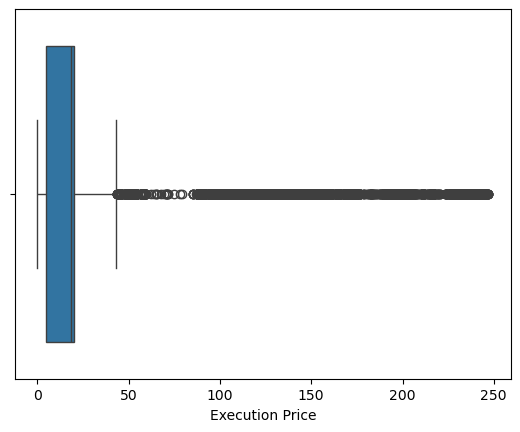

In [67]:
sns.boxplot(x=df['Execution Price'])

In [68]:
df['Execution Price'].median()

18.28

In [69]:
df.loc[(df['Execution Price'] > 38) , 'Execution Price'] = 18.28

<Axes: xlabel='Execution Price'>

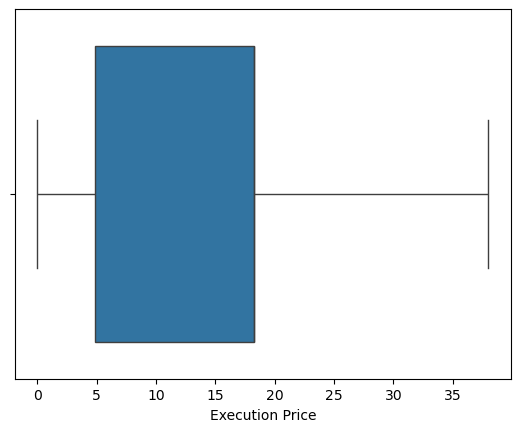

In [70]:
sns.boxplot(x=df['Execution Price'])

In [71]:
detect_outliers_IQR(df, 'Size Tokens')

Size Tokens → 34739 outliers


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-12-02 22:50:00,2024-12-02,Extreme Greed,80.0
10,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,1463.33,11706.64,BUY,02-12-2024 22:50,1536.132166,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.512166,9.440000e+13,2024-12-02 22:50:00,2024-12-02,Extreme Greed,80.0
14,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9500,1866.11,14835.57,BUY,02-12-2024 22:51,3134.792439,Buy,0.0,0x21b8b230ad8a3e9ae1bb041841332f02028300681b0d...,52018049026,True,0.653138,7.780000e+13,2024-12-02 22:51:00,2024-12-02,Extreme Greed,80.0
34,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.4900,1513.61,11336.94,BUY,02-12-2024 23:13,7485.769065,Buy,0.0,0x40a5eae7d00acbbfc3c7041841836c02010a00f9d7d3...,52025109688,True,0.529763,2.450000e+14,2024-12-02 23:13:00,2024-12-02,Extreme Greed,80.0
44,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0570,2446.39,22156.95,SELL,03-12-2024 14:39,10000.498600,Sell,0.0,0x7b57a76296641058064004184ed84d01d0005daded34...,52200758791,True,7.754933,5.190000e+14,2024-12-03 14:39:00,2024-12-03,Extreme Greed,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211216,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2518.50,2772.87,SELL,25-04-2025 15:35,11357.200000,Close Long,0.0,0xe7847dc3b4513b1a6fc30422374d8c0203300046c97c...,88803313862,False,0.277286,1.360000e+14,2025-04-25 15:35:00,2025-04-25,Greed,60.0
211217,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,1064.20,1171.68,SELL,25-04-2025 15:35,8838.700000,Close Long,0.0,0x69083c7e09f93eaaa08a0422374d8e02026e00389c33...,88803313862,False,0.117168,1.850000e+14,2025-04-25 15:35:00,2025-04-25,Greed,60.0
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,0.0,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,2025-04-25 15:35:00,2025-04-25,Greed,60.0
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,0.0,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,2025-04-25 15:35:00,2025-04-25,Greed,60.0


<Axes: xlabel='Size Tokens'>

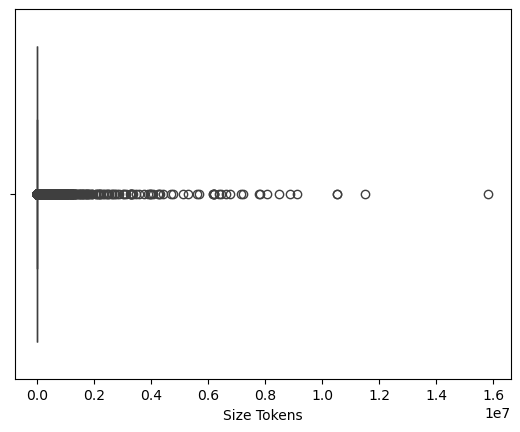

In [72]:
sns.boxplot(x=df['Size Tokens'])

In [73]:
df['Size Tokens'].median()

32.0

In [74]:
df['Size Tokens'].nunique()

59300

In [75]:
df['Size Tokens'].mean()

4623.341035178313

In [76]:
df.loc[(df['Size Tokens'] < lower) | (df['Size Tokens'] > upper), 'Size Tokens'] = df['Size Tokens'].median()

<Axes: xlabel='Size Tokens'>

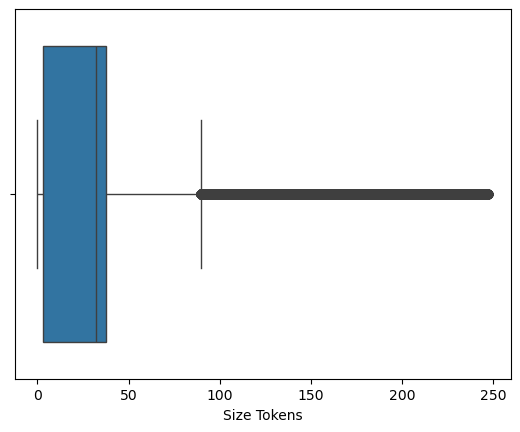

In [77]:
sns.boxplot(x=df['Size Tokens'])

In [78]:
df.loc[(df['Size Tokens'] >75), 'Size Tokens'] = df['Size Tokens'].median()

<Axes: xlabel='Size Tokens'>

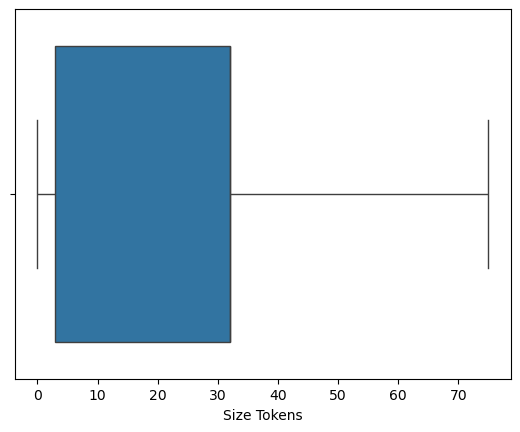

In [79]:
sns.boxplot(x=df['Size Tokens'])

In [80]:
detect_outliers_IQR(df, 'Size USD')

Size USD → 32660 outliers


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,32.0,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-12-02 22:50:00,2024-12-02,Extreme Greed,80.0
10,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,32.0,11706.64,BUY,02-12-2024 22:50,1536.132166,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.512166,9.440000e+13,2024-12-02 22:50:00,2024-12-02,Extreme Greed,80.0
14,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9500,32.0,14835.57,BUY,02-12-2024 22:51,3134.792439,Buy,0.0,0x21b8b230ad8a3e9ae1bb041841332f02028300681b0d...,52018049026,True,0.653138,7.780000e+13,2024-12-02 22:51:00,2024-12-02,Extreme Greed,80.0
34,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.4900,32.0,11336.94,BUY,02-12-2024 23:13,7485.769065,Buy,0.0,0x40a5eae7d00acbbfc3c7041841836c02010a00f9d7d3...,52025109688,True,0.529763,2.450000e+14,2024-12-02 23:13:00,2024-12-02,Extreme Greed,80.0
44,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0570,32.0,22156.95,SELL,03-12-2024 14:39,10000.498600,Sell,0.0,0x7b57a76296641058064004184ed84d01d0005daded34...,52200758791,True,7.754933,5.190000e+14,2024-12-03 14:39:00,2024-12-03,Extreme Greed,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211012,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1610,32.0,23642.49,SELL,23-04-2025 10:09,20363.900000,Close Long,0.0,0xcc1adb03eb22566cc439042213244c016500712b77c6...,88205183430,True,8.274870,5.510000e+14,2025-04-23 10:09:00,2025-04-23,Greed,72.0
211068,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1540,32.0,26405.14,BUY,23-04-2025 15:30,35794.200000,Open Long,0.0,0x8fe45de6c1b39df25e50042216cff4017500573817dc...,88264995359,False,2.640513,5.240000e+14,2025-04-23 15:30:00,2025-04-23,Greed,72.0
211073,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1540,32.0,27544.71,BUY,23-04-2025 15:30,61105.500000,Open Long,0.0,0xed9cbded33fce27b4228042216cff60193009a672ae8...,88264995359,False,2.754471,1.180000e+14,2025-04-23 15:30:00,2025-04-23,Greed,72.0
211201,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.0840,32.0,7875.59,SELL,24-04-2025 17:34,57265.300000,Close Long,0.0,0xe3a0ab89f17234cba88c042228839e01f50077b6a7f2...,88566548927,False,0.787558,1.110000e+15,2025-04-24 17:34:00,2025-04-24,Greed,63.0


<Axes: xlabel='Size USD'>

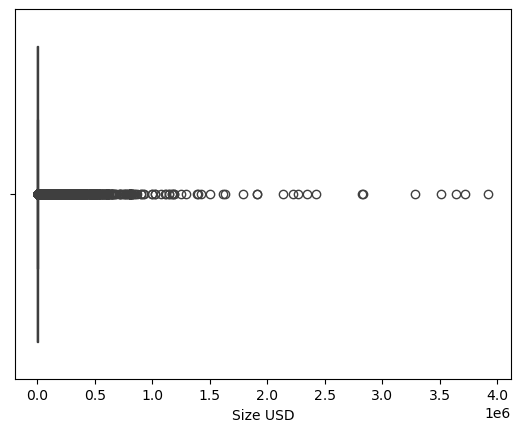

In [81]:
sns.boxplot(x=df['Size USD'])

In [82]:
df['Size USD'].median()

597.02

In [83]:
df.loc[(df['Size USD'] < lower) | (df['Size USD'] > upper), 'Size USD'] = df['Size USD'].median()

<Axes: xlabel='Size USD'>

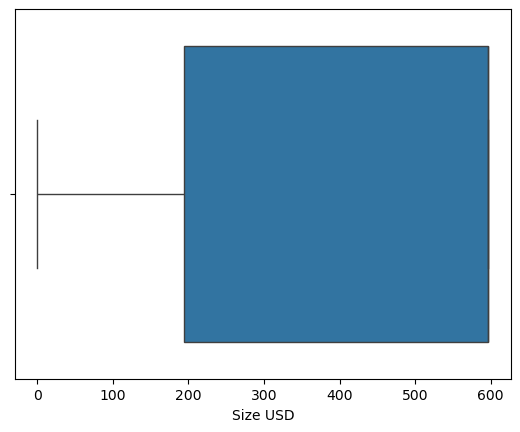

In [84]:
sns.boxplot(x=df['Size USD'])

In [85]:
detect_outliers_IQR(df, 'Start Position')

Start Position → 58343 outliers


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
199,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.61041,32.0,597.02,BUY,04-03-2025 23:23,28011.6,Open Long,0.0,0x6062349d392719a20336041ee797e502012c0064a4a2...,77138632929,True,0.337323,6.840000e+14,2025-03-04 23:23:00,2025-03-04,Extreme Fear,15.0
200,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.61102,32.0,597.02,BUY,04-03-2025 23:23,29656.3,Open Long,0.0,0x6062349d392719a20336041ee797e502012c0064a4a2...,77138632929,True,14.441752,1.090000e+15,2025-03-04 23:23:00,2025-03-04,Extreme Fear,15.0
201,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.61087,32.0,597.02,BUY,04-03-2025 23:23,100000.0,Open Long,0.0,0x6b946ed45a4d03f8d19c041ee7983401d2004bac4b39...,77138653594,True,0.301227,7.590000e+14,2025-03-04 23:23:00,2025-03-04,Extreme Fear,15.0
202,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.61089,32.0,597.02,BUY,04-03-2025 23:23,101467.6,Open Long,0.0,0x6b946ed45a4d03f8d19c041ee7983401d2004bac4b39...,77138653594,True,0.565632,3.640000e+14,2025-03-04 23:23:00,2025-03-04,Extreme Fear,15.0
203,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.61103,32.0,597.02,BUY,04-03-2025 23:23,104223.3,Open Long,0.0,0x6b946ed45a4d03f8d19c041ee7983401d2004bac4b39...,77138653594,True,0.647124,7.480000e+13,2025-03-04 23:23:00,2025-03-04,Extreme Fear,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211207,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.10100,32.0,597.02,SELL,25-04-2025 15:35,35815.4,Close Long,0.0,0x94a171c655fb18f918150422374d8102020300aebdb3...,88803313862,False,0.401259,1.100000e+15,2025-04-25 15:35:00,2025-04-25,Greed,60.0
211208,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.10100,32.0,597.02,SELL,25-04-2025 15:35,32170.9,Close Long,0.0,0x99c0a2b3762b4070a8840422374d8602022d006b2219...,88803313862,False,0.396337,3.590000e+14,2025-04-25 15:35:00,2025-04-25,Greed,60.0
211209,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.10100,32.0,597.02,SELL,25-04-2025 15:35,28571.1,Close Long,0.0,0x4aa231e218a0fc1436920422374d8a02030300ec073f...,88803313862,False,0.057020,1.760000e+14,2025-04-25 15:35:00,2025-04-25,Greed,60.0
211210,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.10100,32.0,597.02,SELL,25-04-2025 15:35,28053.2,Close Long,0.0,0xa168469dcbb2a03a3c370422374d8a020304008d4483...,88803313862,False,0.065927,3.350000e+14,2025-04-25 15:35:00,2025-04-25,Greed,60.0


<Axes: xlabel='Start Position'>

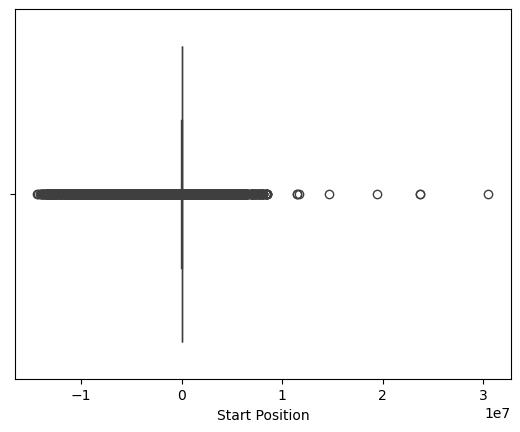

In [86]:
sns.boxplot(x=df['Start Position'])

In [87]:
df.loc[(df['Start Position'] < lower) | (df['Start Position'] > upper), 'Start Position'] = df['Start Position'].median()

<Axes: xlabel='Start Position'>

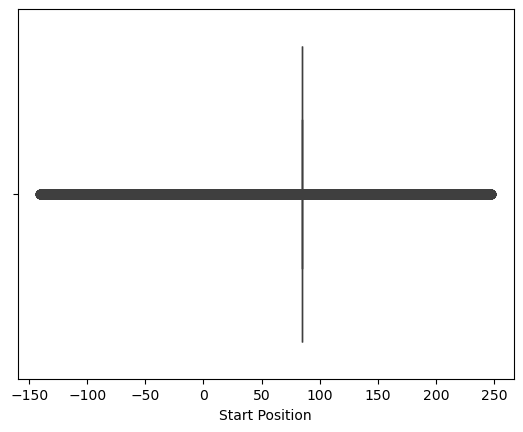

In [88]:
sns.boxplot(x=df['Start Position'])

In [89]:
# Fee
detect_outliers_IQR(df, 'Fee')

Fee → 30276 outliers


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
44,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.057,32.00,597.02,SELL,03-12-2024 14:39,84.77051,Sell,0.0,0x7b57a76296641058064004184ed84d01d0005daded34...,52200758791,True,7.754933,5.190000e+14,2024-12-03 14:39:00,2024-12-03,Extreme Greed,76.0
52,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.040,32.00,597.02,SELL,03-12-2024 14:39,84.77051,Sell,0.0,0x7b57a76296641058064004184ed84d01d0005daded34...,52200758791,True,1.582000,9.220000e+14,2024-12-03 14:39:00,2024-12-03,Extreme Greed,76.0
53,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.040,32.00,597.02,SELL,03-12-2024 14:39,84.77051,Sell,0.0,0x7b57a76296641058064004184ed84d01d0005daded34...,52200758791,True,1.582000,3.000000e+14,2024-12-03 14:39:00,2024-12-03,Extreme Greed,76.0
68,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,18.280,15.45,597.02,BUY,03-12-2024 14:42,27.87000,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,1.271249,7.960000e+14,2024-12-03 14:42:00,2024-12-03,Extreme Greed,76.0
69,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,18.280,32.00,597.02,BUY,03-12-2024 14:42,43.32000,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,12.894058,6.740000e+14,2024-12-03 14:42:00,2024-12-03,Extreme Greed,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211008,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.161,32.00,597.02,SELL,23-04-2025 10:09,84.77051,Close Long,0.0,0xcc1adb03eb22566cc439042213244c016500712b77c6...,88205183430,True,1.882213,1.000000e+15,2025-04-23 10:09:00,2025-04-23,Greed,72.0
211011,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.161,32.00,597.02,SELL,23-04-2025 10:09,84.77051,Close Long,0.0,0xcc1adb03eb22566cc439042213244c016500712b77c6...,88205183430,True,4.384516,5.710000e+14,2025-04-23 10:09:00,2025-04-23,Greed,72.0
211012,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.161,32.00,597.02,SELL,23-04-2025 10:09,84.77051,Close Long,0.0,0xcc1adb03eb22566cc439042213244c016500712b77c6...,88205183430,True,8.274870,5.510000e+14,2025-04-23 10:09:00,2025-04-23,Greed,72.0
211068,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.154,32.00,597.02,BUY,23-04-2025 15:30,84.77051,Open Long,0.0,0x8fe45de6c1b39df25e50042216cff4017500573817dc...,88264995359,False,2.640513,5.240000e+14,2025-04-23 15:30:00,2025-04-23,Greed,72.0


<Axes: xlabel='Fee'>

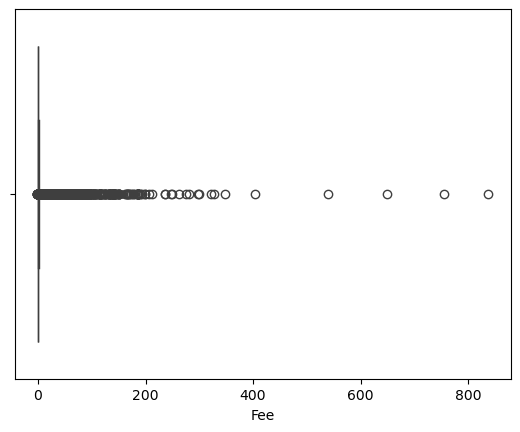

In [90]:
sns.boxplot(x=df['Fee'])

In [91]:
df.loc[(df['Fee'] < lower) | (df['Fee'] > upper), 'Fee'] = df['Fee'].median()

<Axes: xlabel='Fee'>

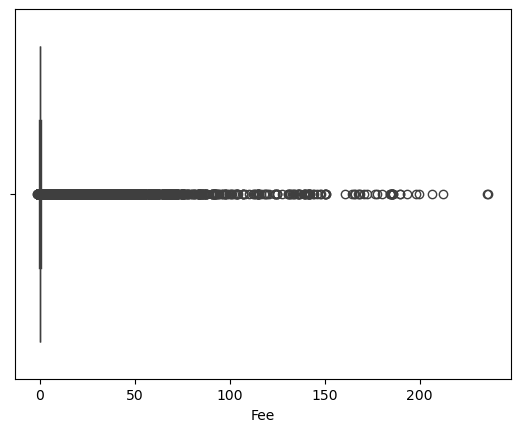

In [92]:
sns.boxplot(x=df['Fee'])

In [93]:
df['Fee'].nunique()

138782

## Encoding

In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
# Target variable: classification
le = LabelEncoder()
df['classification_encoded'] = le.fit_transform(df['classification'])

C:\Users\rptha\AppData\Local\Temp\ipykernel_11556\1576506761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['classification_encoded'] = le.fit_transform(df['classification'])


In [97]:
# Check mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Target encoding mapping:", mapping)

Target encoding mapping: {'Extreme Fear': 0, 'Extreme Greed': 1, 'Fear': 2, 'Greed': 3, 'Neutral': 4}


In [98]:
# Binary encoding for Side
df['Side_encoded'] = df['Side'].map({'BUY':1, 'SELL':0})

C:\Users\rptha\AppData\Local\Temp\ipykernel_11556\3405236311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Side_encoded'] = df['Side'].map({'BUY':1, 'SELL':0})


In [99]:
# One-hot encoding for Direction
df = pd.get_dummies(df, columns=['Direction'], prefix='Dir')

In [100]:
df.dtypes

Account                                  object
Coin                                     object
Execution Price                         float64
Size Tokens                             float64
Size USD                                float64
Side                                     object
Timestamp IST                            object
Start Position                          float64
Closed PnL                              float64
Transaction Hash                         object
Order ID                                  int64
Crossed                                    bool
Fee                                     float64
Trade ID                                float64
Timestamp                        datetime64[ns]
date                             datetime64[ns]
classification                           object
value                                   float64
classification_encoded                    int32
Side_encoded                              int64
Dir_Auto-Deleveraging                   

In [101]:
df['Side'].head()

0    BUY
1    BUY
2    BUY
3    BUY
4    BUY
Name: Side, dtype: object

In [102]:
df['Side'].nunique()

2

In [103]:
df['Side_encoded'].nunique()

2

In [104]:
df['Coin'].nunique()

246

In [105]:
# Drop original categorical columns
df_model = df.drop(columns=['classification', 'Side',  'Account', 'Coin', 
                            'Transaction Hash', 'Order ID', 'Trade ID', 'Timestamp IST', 'Timestamp', 'date'])

In [106]:
# Drop original categorical columns
cat_cols_to_drop = ['classification', 'Side']
df.drop(columns=cat_cols_to_drop, inplace=True)

In [107]:
df.dtypes

Account                                  object
Coin                                     object
Execution Price                         float64
Size Tokens                             float64
Size USD                                float64
Timestamp IST                            object
Start Position                          float64
Closed PnL                              float64
Transaction Hash                         object
Order ID                                  int64
Crossed                                    bool
Fee                                     float64
Trade ID                                float64
Timestamp                        datetime64[ns]
date                             datetime64[ns]
value                                   float64
classification_encoded                    int32
Side_encoded                              int64
Dir_Auto-Deleveraging                      bool
Dir_Buy                                    bool
Dir_Close Long                          

In [108]:
cat_cols_to_drop = ['Account','Coin']

In [109]:
df.drop(columns=cat_cols_to_drop, inplace=True)

### Train Test split

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
# Features and target
X = df.drop(columns=['classification_encoded', 'value'])
y = df['classification_encoded']

In [113]:
# Train-test split (e.g., 80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [315]:
# Save each dataset to CSV
X_train.to_csv('outputs/X_train.csv', index=False)
y_train.to_csv('outputs/y_train.csv', index=False)
X_test.to_csv('outputs/X_test.csv', index=False)
y_test.to_csv('outputs/y_test.csv', index=False)

In [114]:
X_train.shape

(168974, 26)

In [115]:
X_test.shape

(42244, 26)

In [116]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168974 entries, 30153 to 129322
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Execution Price                168974 non-null  float64       
 1   Size Tokens                    168974 non-null  float64       
 2   Size USD                       168974 non-null  float64       
 3   Timestamp IST                  168974 non-null  object        
 4   Start Position                 168974 non-null  float64       
 5   Closed PnL                     168974 non-null  float64       
 6   Transaction Hash               168974 non-null  object        
 7   Order ID                       168974 non-null  int64         
 8   Crossed                        168974 non-null  bool          
 9   Fee                            168974 non-null  float64       
 10  Trade ID                       168974 non-null  float64       
 11  T

In [117]:
## Standardization

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
# Initialize scaler
scaler = StandardScaler()

In [120]:
X_train.dtypes

Execution Price                         float64
Size Tokens                             float64
Size USD                                float64
Timestamp IST                            object
Start Position                          float64
Closed PnL                              float64
Transaction Hash                         object
Order ID                                  int64
Crossed                                    bool
Fee                                     float64
Trade ID                                float64
Timestamp                        datetime64[ns]
date                             datetime64[ns]
Side_encoded                              int64
Dir_Auto-Deleveraging                      bool
Dir_Buy                                    bool
Dir_Close Long                             bool
Dir_Close Short                            bool
Dir_Liquidated Isolated Short              bool
Dir_Long > Short                           bool
Dir_Open Long                           

In [121]:
df['Transaction Hash'].nunique()

101181

In [122]:
X_train.drop(['Transaction Hash', 'Timestamp', 'date'], axis=1, inplace=True)

In [123]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168974 entries, 30153 to 129322
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Execution Price                168974 non-null  float64
 1   Size Tokens                    168974 non-null  float64
 2   Size USD                       168974 non-null  float64
 3   Timestamp IST                  168974 non-null  object 
 4   Start Position                 168974 non-null  float64
 5   Closed PnL                     168974 non-null  float64
 6   Order ID                       168974 non-null  int64  
 7   Crossed                        168974 non-null  bool   
 8   Fee                            168974 non-null  float64
 9   Trade ID                       168974 non-null  float64
 10  Side_encoded                   168974 non-null  int64  
 11  Dir_Auto-Deleveraging          168974 non-null  bool   
 12  Dir_Buy                        

In [124]:
X_train.dtypes

Execution Price                  float64
Size Tokens                      float64
Size USD                         float64
Timestamp IST                     object
Start Position                   float64
Closed PnL                       float64
Order ID                           int64
Crossed                             bool
Fee                              float64
Trade ID                         float64
Side_encoded                       int64
Dir_Auto-Deleveraging               bool
Dir_Buy                             bool
Dir_Close Long                      bool
Dir_Close Short                     bool
Dir_Liquidated Isolated Short       bool
Dir_Long > Short                    bool
Dir_Open Long                       bool
Dir_Open Short                      bool
Dir_Sell                            bool
Dir_Settlement                      bool
Dir_Short > Long                    bool
Dir_Spot Dust Conversion            bool
dtype: object

In [125]:
X_train.drop(['Timestamp IST'], axis=1, inplace=True)

In [126]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168974 entries, 30153 to 129322
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Execution Price                168974 non-null  float64
 1   Size Tokens                    168974 non-null  float64
 2   Size USD                       168974 non-null  float64
 3   Start Position                 168974 non-null  float64
 4   Closed PnL                     168974 non-null  float64
 5   Order ID                       168974 non-null  int64  
 6   Crossed                        168974 non-null  bool   
 7   Fee                            168974 non-null  float64
 8   Trade ID                       168974 non-null  float64
 9   Side_encoded                   168974 non-null  int64  
 10  Dir_Auto-Deleveraging          168974 non-null  bool   
 11  Dir_Buy                        168974 non-null  bool   
 12  Dir_Close Long                 

In [247]:
# define numerical columns
num_cols = [
    'Execution Price',
    'Size Tokens',
    'Size USD',
    'Start Position',
    'Closed PnL',
    'Fee',
    'Trade ID'
]

In [249]:
X_test.drop(['Timestamp','date','Timestamp IST','Transaction Hash'],axis=1,inplace=True)

In [251]:
# make copies
X_train_std = X_train.copy()
X_test_std = X_test.copy()

In [253]:
# apply scaling only on numerical columns
X_train_std[num_cols] = scaler.fit_transform(X_train[num_cols])

In [256]:
X_test.dtypes

Execution Price                  float64
Size Tokens                      float64
Size USD                         float64
Start Position                   float64
Closed PnL                       float64
Order ID                           int64
Crossed                             bool
Fee                              float64
Trade ID                         float64
Side_encoded                       int64
Dir_Auto-Deleveraging               bool
Dir_Buy                             bool
Dir_Close Long                      bool
Dir_Close Short                     bool
Dir_Liquidated Isolated Short       bool
Dir_Long > Short                    bool
Dir_Open Long                       bool
Dir_Open Short                      bool
Dir_Sell                            bool
Dir_Settlement                      bool
Dir_Short > Long                    bool
Dir_Spot Dust Conversion            bool
dtype: object

In [258]:
# scale the test

In [260]:
X_test_std[num_cols] = scaler.transform(X_test[num_cols])

In [262]:
## Logestic regression

In [264]:
from sklearn.linear_model import LogisticRegression

In [266]:
# Initialize model (multi-class)
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)

In [268]:
# Train model
logreg.fit(X_train_std, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial')

In [270]:
## prediction

In [272]:
y_pred = logreg.predict(X_test_std)

In [277]:
y_train_pred = logreg.predict(X_train_std)

In [279]:
# Evaluate the model

In [281]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [283]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.29277530536880975


In [285]:
# Accuracy
print("tarin_Accuracy:", accuracy_score(y_train, y_train_pred))

tarin_Accuracy: 0.29276101648774366


In [287]:
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logreg.coef_[0]
})
print(coeff_df.sort_values(by='Coefficient', ascending=False))

                          Feature   Coefficient
2                        Size USD  1.399352e-22
1                     Size Tokens  8.980669e-23
3                  Start Position  5.785147e-23
16                  Dir_Open Long  2.702538e-23
14  Dir_Liquidated Isolated Short -6.358435e-27
19                 Dir_Settlement -7.590919e-27
8                        Trade ID -3.314423e-26
10          Dir_Auto-Deleveraging -6.664378e-26
20               Dir_Short > Long -1.961217e-25
15               Dir_Long > Short -2.391957e-25
21       Dir_Spot Dust Conversion -8.125294e-25
7                             Fee -1.060664e-24
12                 Dir_Close Long -1.612349e-24
0                 Execution Price -3.130734e-23
4                      Closed PnL -5.030371e-23
11                        Dir_Buy -6.346556e-23
13                Dir_Close Short -6.913578e-23
18                       Dir_Sell -7.428694e-23
17                 Dir_Open Short -9.124698e-23
9                    Side_encoded -1.057

## Decision Tree Classifier

In [289]:
from sklearn.tree import DecisionTreeClassifier

In [291]:
# Initialize and train
dtc = DecisionTreeClassifier(random_state=42, max_depth=7)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [292]:
# Predictions
y_pred_dtc = dtc.predict(X_test)

In [293]:
# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))

Decision Tree Accuracy: 0.905359340971499
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      4280
           1       0.99      0.96      0.97      7998
           2       0.84      0.94      0.89     12368
           3       0.93      0.95      0.94     10061
           4       0.93      0.70      0.80      7537

    accuracy                           0.91     42244
   macro avg       0.91      0.90      0.90     42244
weighted avg       0.91      0.91      0.90     42244



In [297]:
# Training accuracy
train_accuracy_dtc = accuracy_score(y_train, dtc.predict(X_train))
print("Decision Tree Training Accuracy (max_depth=7):", train_accuracy_dtc)

Decision Tree Training Accuracy (max_depth=7): 0.9072875116881887


In [299]:
X_train.columns

Index(['Execution Price', 'Size Tokens', 'Size USD', 'Start Position',
       'Closed PnL', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Side_encoded',
       'Dir_Auto-Deleveraging', 'Dir_Buy', 'Dir_Close Long', 'Dir_Close Short',
       'Dir_Liquidated Isolated Short', 'Dir_Long > Short', 'Dir_Open Long',
       'Dir_Open Short', 'Dir_Sell', 'Dir_Settlement', 'Dir_Short > Long',
       'Dir_Spot Dust Conversion'],
      dtype='object')

## Random Forest Classification

In [301]:
from sklearn.ensemble import RandomForestClassifier

In [303]:
rfc = RandomForestClassifier(class_weight='balanced', random_state=42,max_depth=15, n_estimators=200)

In [305]:
# Train
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=200,
                       random_state=42)

In [306]:
y_pred_rfc = rfc.predict(X_test)

In [307]:
# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rfc))

# Classification report
print(classification_report(y_test, y_pred_rfc))

Random Forest Accuracy: 0.9123899251964777
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      4280
           1       0.94      0.97      0.96      7998
           2       0.93      0.88      0.90     12368
           3       0.93      0.93      0.93     10061
           4       0.91      0.84      0.87      7537

    accuracy                           0.91     42244
   macro avg       0.90      0.92      0.91     42244
weighted avg       0.91      0.91      0.91     42244



In [308]:
train_accuracy_rfc = accuracy_score(y_train, rfc.predict(X_train))
print("Random Forest Training Accuracy:", train_accuracy_rfc)

Random Forest Training Accuracy: 0.9329660184407068


In [321]:

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    # Save to outputs folder
    plt.savefig(f"outputs/confusion_matrix_{model_name}.png", dpi=300, bbox_inches="tight")
    plt.close()
    

In [325]:
y_pred_dtc = dtc.predict(X_test)
plot_confusion_matrix(y_test, y_pred_dtc, "DecisionTree")